In [1]:
from tqdm import tqdm

import torch
import numpy as np
import pandas as pd

C:\Users\jsfz\anaconda3\envs\pytorch17\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [82]:
all_feas = np.load("draw_wos_data/bert_pretrained_test_alllabel_randomchoice.npy")

In [83]:
all_feas.shape

(14097, 768)

In [84]:
# dimension decomposition
from sklearn.decomposition import KernelPCA
decomposer = KernelPCA(n_components=2, kernel="linear")
feas_2d = decomposer.fit_transform(all_feas)

In [85]:
def l2_normailzation(data):
    norms = np.linalg.norm(data, axis=1, keepdims=True)
    return data / norms

In [86]:
feas_2d_normed = l2_normailzation(feas_2d)

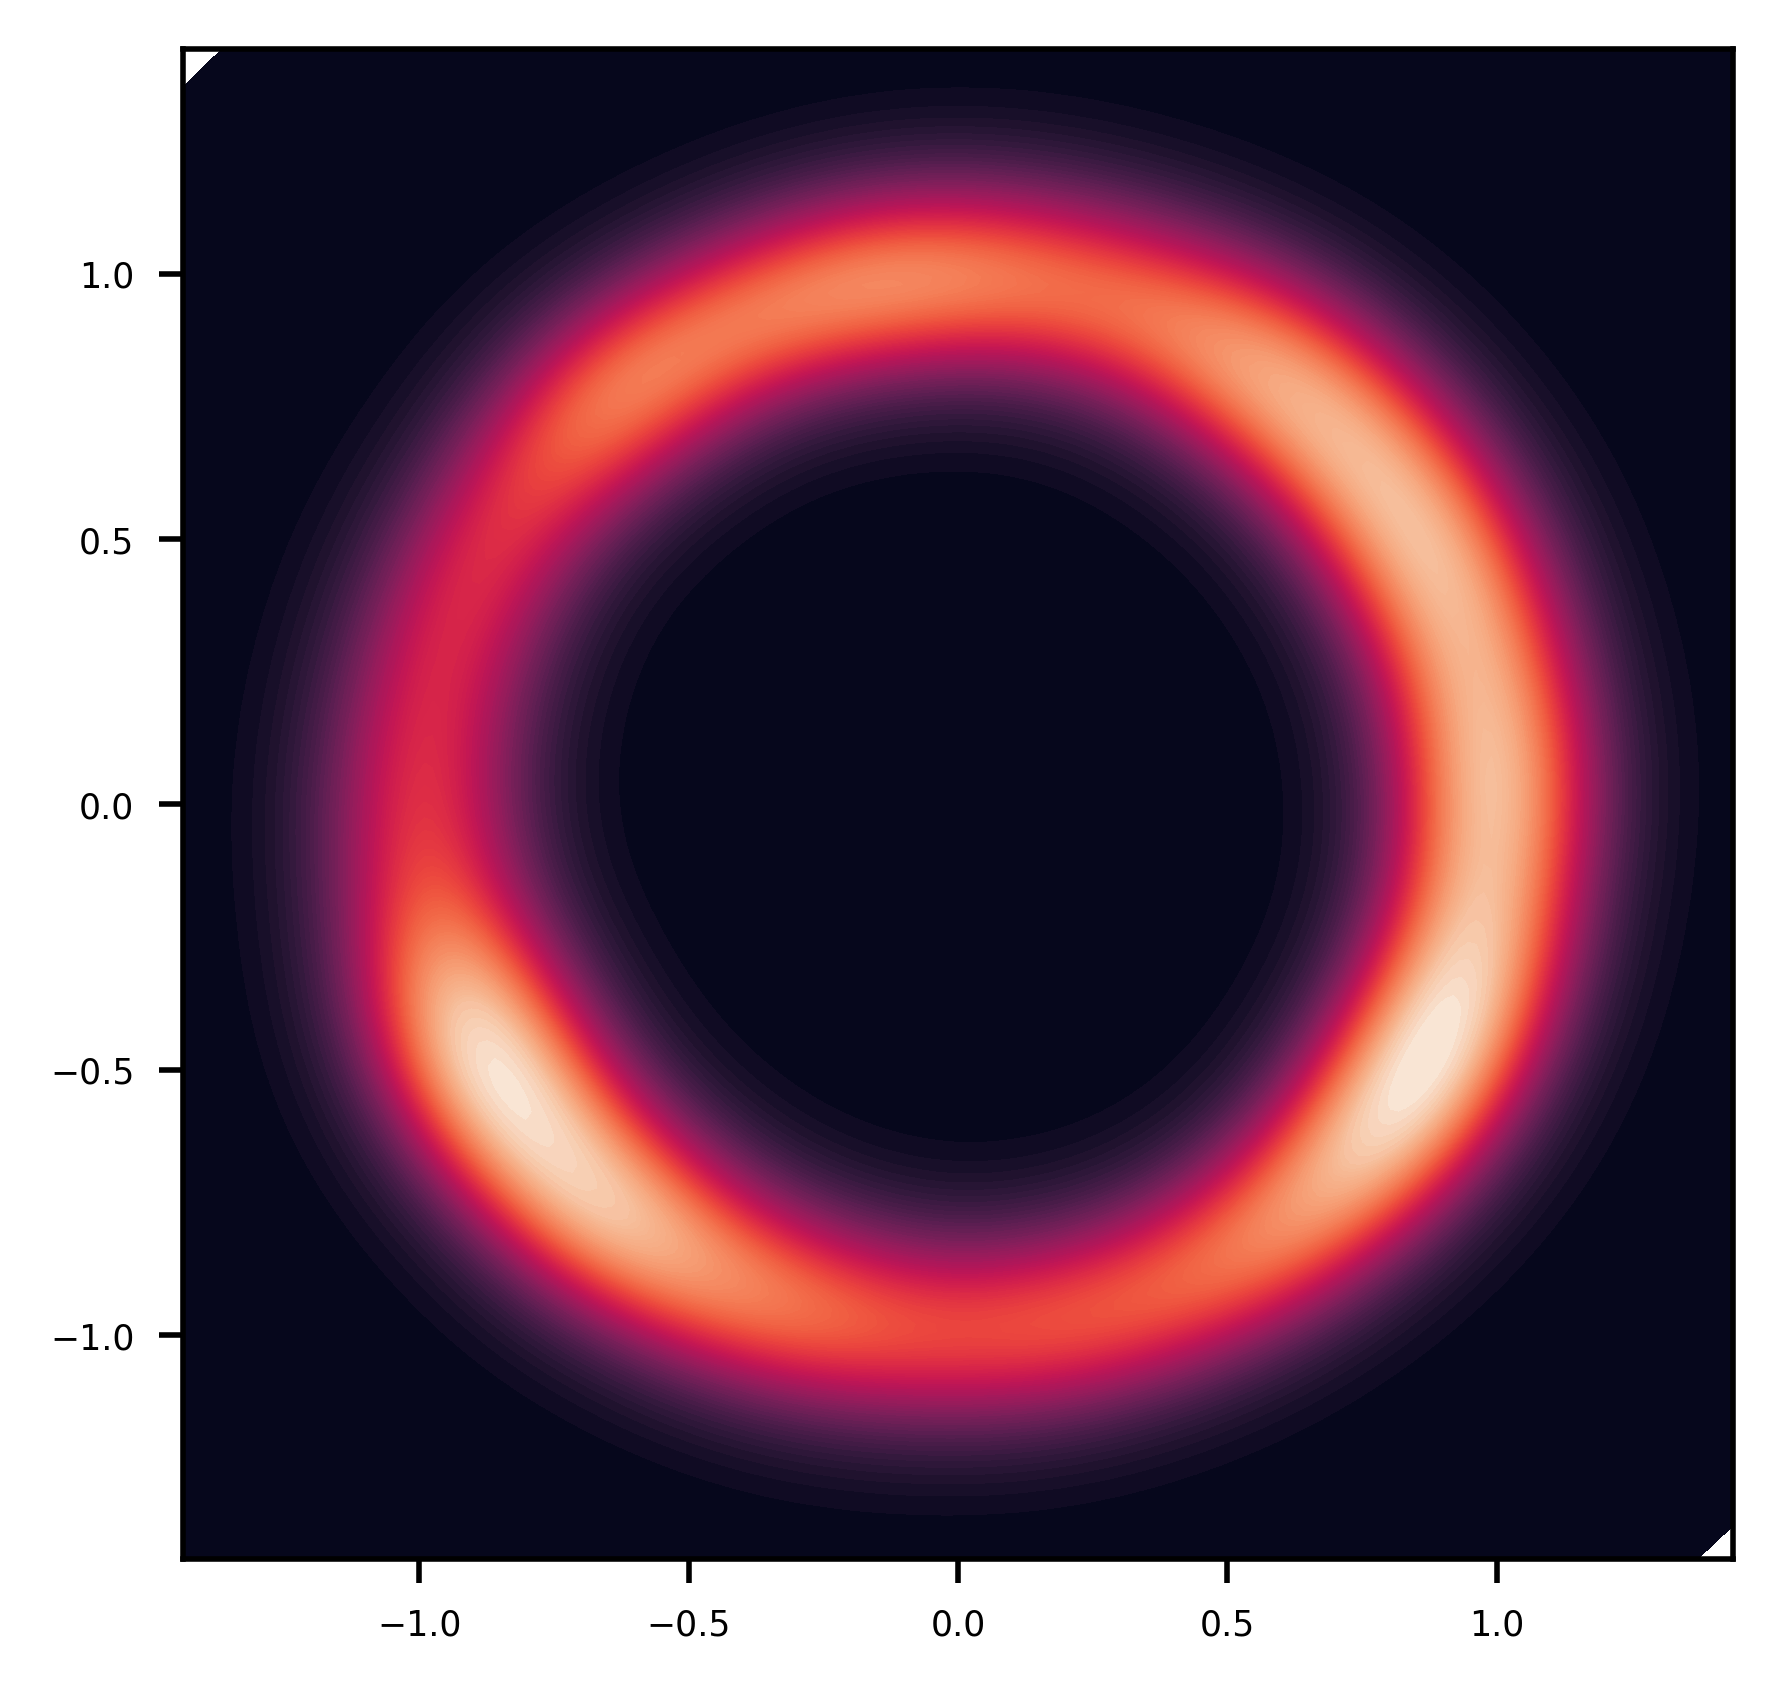

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt


fig1, ax1 = plt.subplots(figsize=(4,4), dpi=500)
ax1 = sns.kdeplot(x=feas_2d_normed[:, 0], y=feas_2d_normed[:, 1], fill=True, thresh=0, levels=100, cmap="rocket")
ax1.tick_params(labelsize=5)

In [114]:
fig1.savefig("draw_wos_data/bert_pretrained_test_alllabel_featureskde.jpg", dpi=500, bbox_inches="tight", pad_inches=0)